#K-means e hierarchical clustering

In [15]:
# Importamos las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [18]:
# Cargamos el dataset y mostramos las 5 primeras filas
dataset = pd.read_csv("C:/Users/HP 15-gw0005la/Documents/ACTIVIDADES UNAD/Periodo 16-01-2024/Analisis de Datos/Tarea 4 - Algoritmos de Aprendizaje No Supervisado/Anexo 5 - Dataset Mall Customer Segmentation/Clientes del centro comercial_.csv")
dataset.head()

,ID_del_cliente,Genero,Edad,Ingreso_anual (k$),Puntuacion_de_gasto_(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
dataset.shape

(200, 5)

In [22]:
data=dataset.drop(["Genero"],axis=1)

In [23]:
data.head()

,ID_del_cliente,Edad,Ingreso_anual (k$),Puntuacion_de_gasto_(1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [25]:
data.describe()

,ID_del_cliente,Edad,Ingreso_anual (k$),Puntuacion_de_gasto_(1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [26]:
data.isna().sum()

ID_del_cliente                 0
Edad                           0
Ingreso_anual (k$)             0
Puntuacion_de_gasto_(1-100)    0
dtype: int64

In [27]:
data.dropna()

,ID_del_cliente,Edad,Ingreso_anual (k$),Puntuacion_de_gasto_(1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


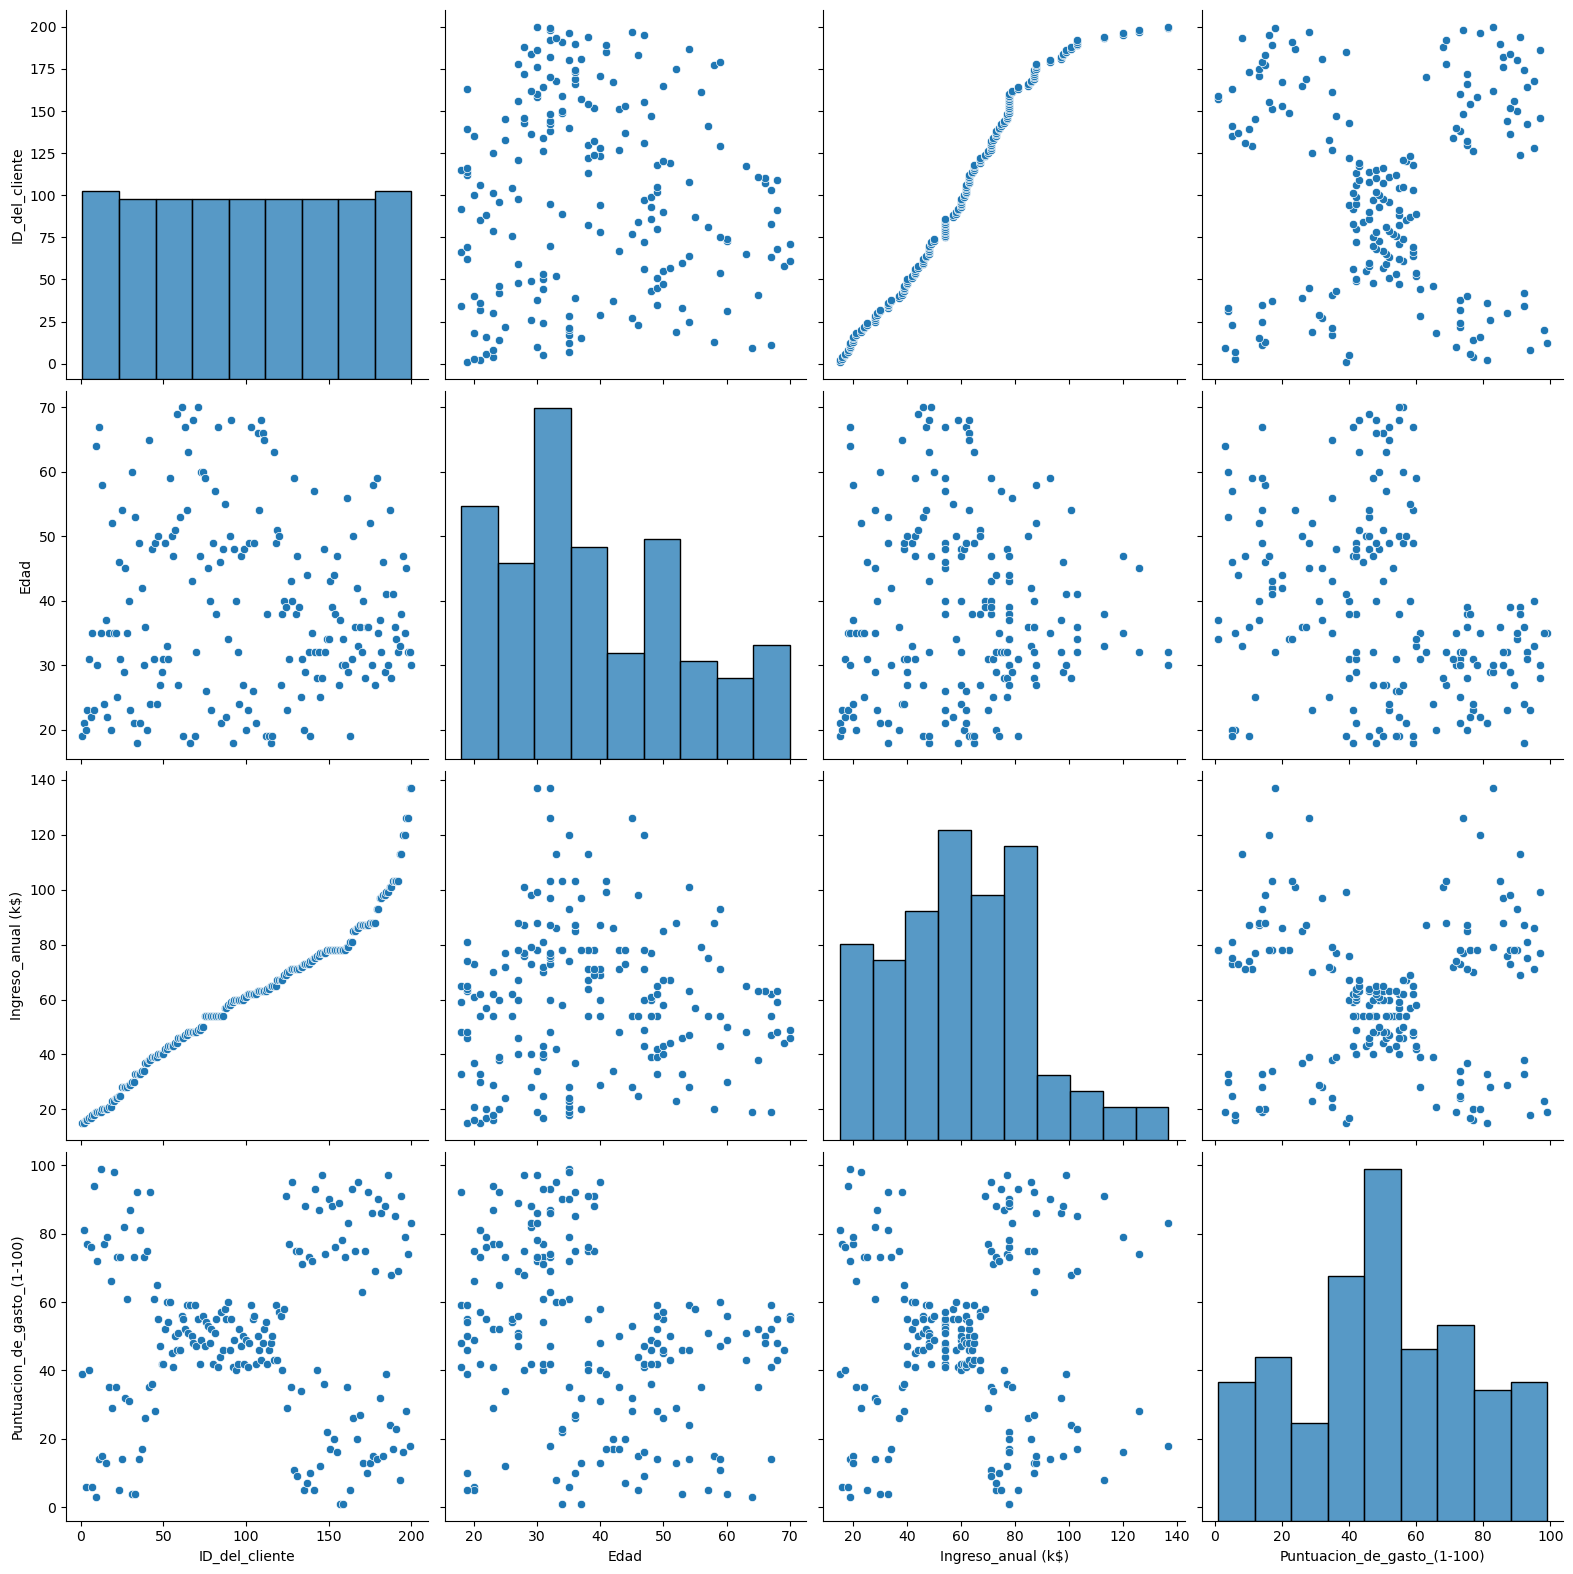

In [28]:
sns.pairplot(data.dropna(), size=4,kind="scatter")

In [29]:
# Matriz de correlación
corr_matrix = data.corr()
corr_matrix

,ID_del_cliente,Edad,Ingreso_anual (k$),Puntuacion_de_gasto_(1-100)
ID_del_cliente,1.000000,-0.026763,0.977548,0.013835
Edad,-0.026763,1.000000,-0.012398,-0.327227
Ingreso_anual (k$),0.977548,-0.012398,1.000000,0.009903
Puntuacion_de_gasto_(1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

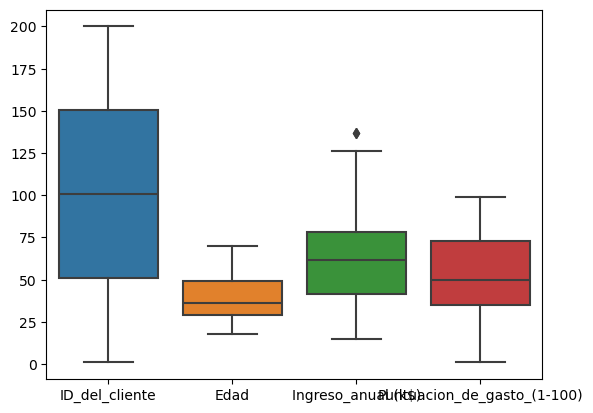

In [30]:
#Se crea el diagrama de caja
sns.boxplot(data=data)

In [34]:
# Se estandarizan los datos antes del K-Means

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
X

,ID_del_cliente,Edad,Ingreso_anual (k$),Puntuacion_de_gasto_(1-100)
0,-1.723412,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.281035,-1.738999,1.195704
2,-1.688771,-1.352802,-1.700830,-1.715913
3,-1.671450,-1.137502,-1.700830,1.040418
4,-1.654129,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,1.654129,-0.276302,2.268791,1.118061
196,1.671450,0.441365,2.497807,-0.861839
197,1.688771,-0.491602,2.497807,0.923953
198,1.706091,-0.491602,2.917671,-1.250054


# K-Means

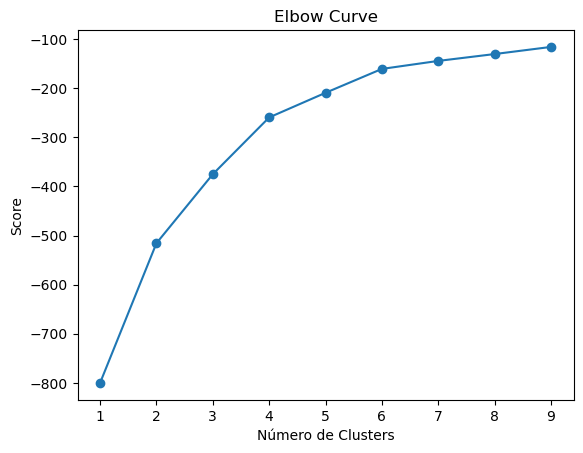

In [35]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
plt.plot(Nc, score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [36]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
centroids

array([[-0.47436436,  1.15787451, -0.42523207, -0.38283068],
       [ 0.96109881, -0.3121851 ,  0.89912973,  0.06446185],
       [-1.0239213 , -0.86423656, -0.98001477,  0.34984199]])

In [37]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.labels_
# Obtenemos los centroides
c = kmeans.cluster_centers_
colores = ['blue', 'black', 'green']
asignar = []
for row in labels:
    asignar.append(colores[row])

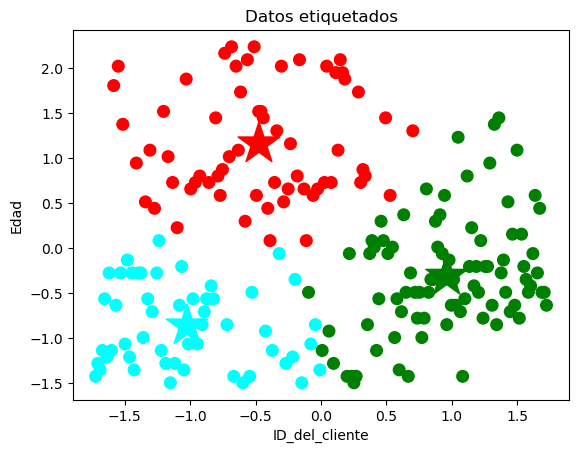

In [40]:
f1 = X["ID_del_cliente"].values
f2 = X["Edad"].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(c[:, 0], c[:, 1], marker='*', c=colores, s=1000)
plt.title("Datos etiquetados")
plt.xlabel("ID_del_cliente")
plt.ylabel("Edad")
plt.show()

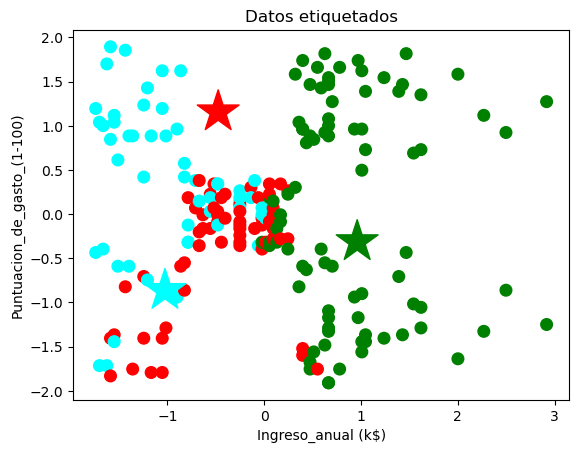

In [44]:
f1 = X["Ingreso_anual (k$)"].values
f2 = X["Puntuacion_de_gasto_(1-100)"].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(c[:, 0], c[:, 1], marker='*', c=colores, s=1000)
plt.title("Datos etiquetados")
plt.xlabel("Ingreso_anual (k$)")
plt.ylabel("Puntuacion_de_gasto_(1-100)")
plt.show()

In [45]:
X_new = scaler.fit_transform(np.array([[5.4,3.3,1.2,0.25]]))
new_label = kmeans.predict(X_new)
color=[]
for row in new_label:
    color.append(colores[row])
print(new_label)
print(color)

[1]
['green']


In [46]:
# Calcular medidas de calidad para K-Means
print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels))
print("Inertia (suma de cuadrados dentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels))

Medidas de calidad para K-Means:
Puntaje de silueta: 0.33627250175154105
Índice de Calinski-Harabasz: 111.48622496693122
Inertia (suma de cuadrados dentro de los clusters): 375.2627107440475
Davies-Bouldin Index: 1.0218705983348075


# Hierarchical clustering

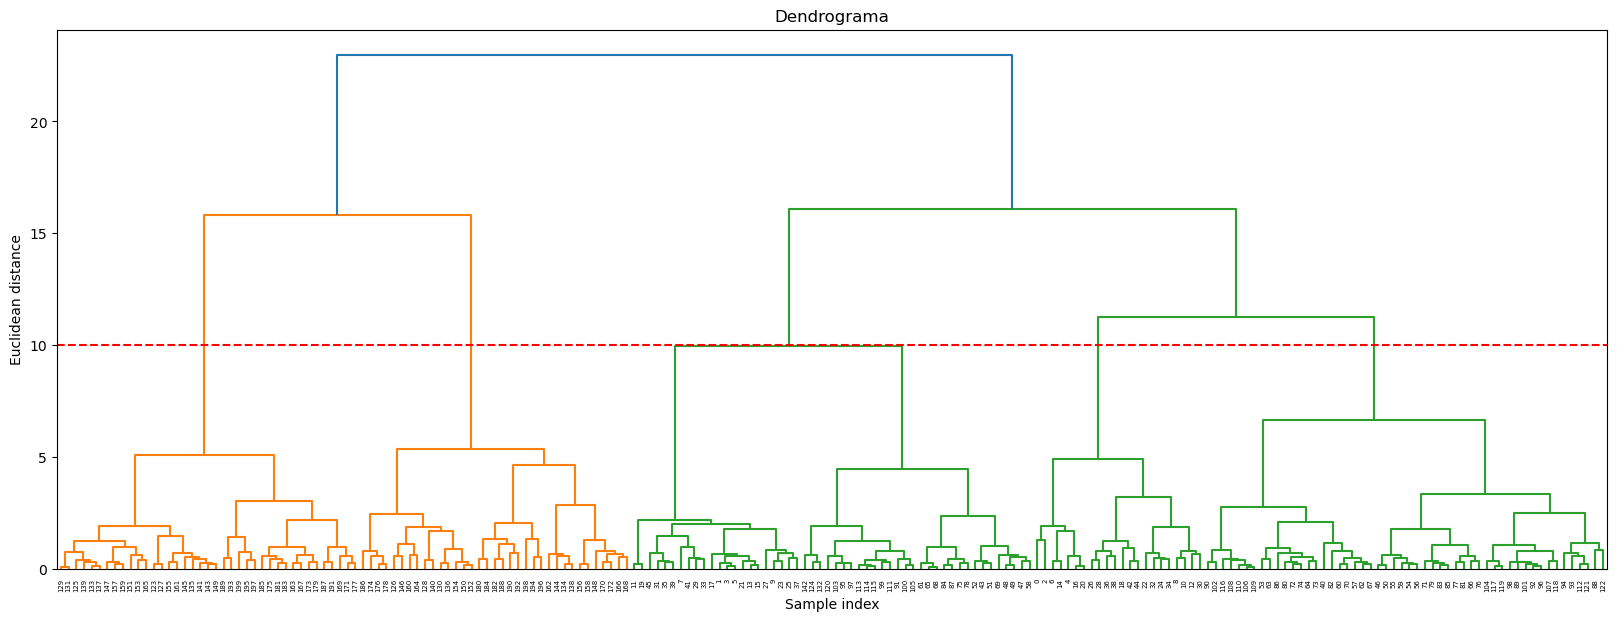

In [47]:
ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.title('Dendrograma')
plt.axhline(y = 10, color = 'r', linestyle = "--")
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [48]:
hier_clustering = AgglomerativeClustering(n_clusters=3)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [49]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = labels_hier
colores=['red', 'green', 'cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

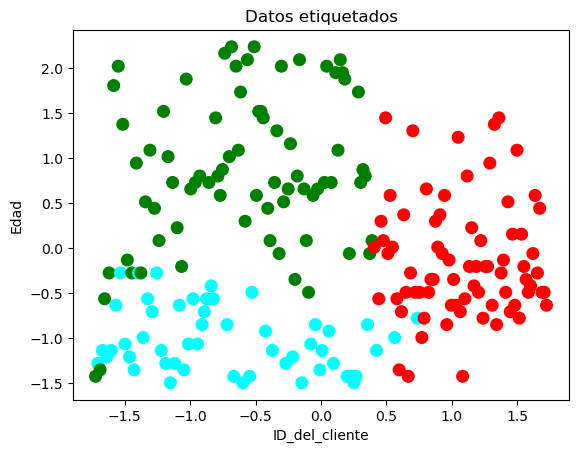

In [50]:
f1 = X['ID_del_cliente'].values
f2 = X['Edad'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('ID_del_cliente')
plt.ylabel('Edad')
plt.show()

In [52]:
def plot_dendrogram(model, **kwargs):
    from scipy.cluster.hierarchy import dendrogram
    import numpy as np
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # Leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    distances = np.arange(model.children_.shape[0])
    linkage_matrix = np.column_stack([model.children_, distances, counts]).astype(float)
    # Plot
    plt.figure(figsize=(20, 7))
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Dendrograma')
    plt.xlabel('Sample index')
    plt.ylabel('Euclidean distance')
    plt.show()


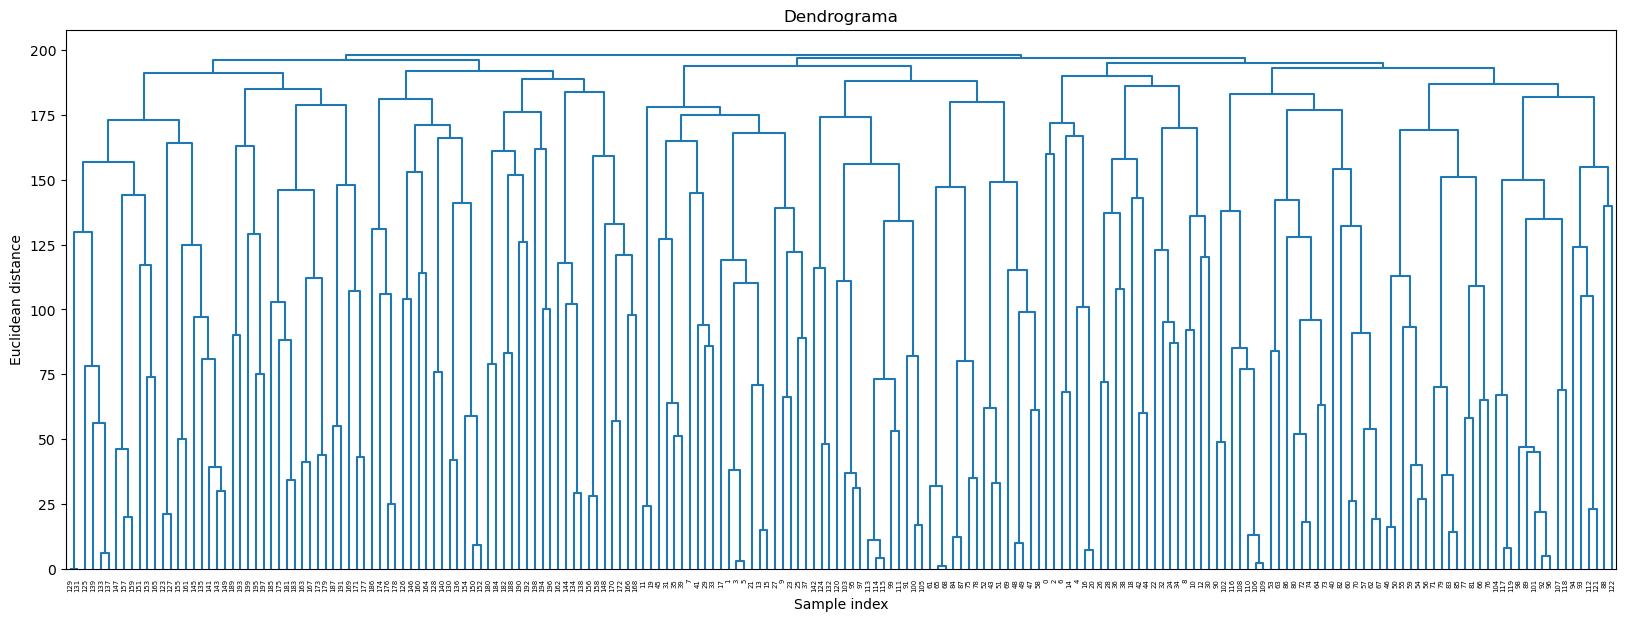

In [54]:
plot_dendrogram(hier_clustering, color_threshold=0)

Text(0, 0.5, 'Media indices silhouette')

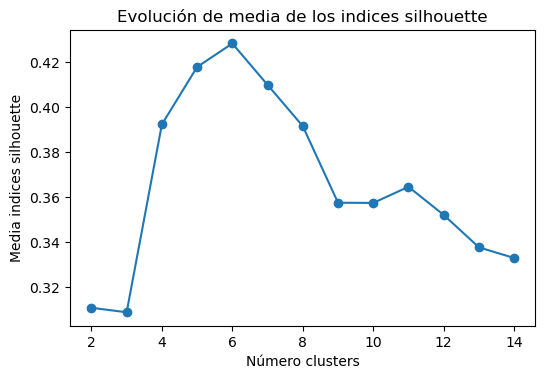

In [55]:
# Método silhouette para identificar el número óptimo de clusters
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
        affinity = 'euclidean',
        linkage = 'ward',
        n_clusters = n_clusters
    )
    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los indices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel("Media indices silhouette")

In [56]:
# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.30874740679157575
Índice de Calinski-Harabasz: 94.85428751941517
Davies-Bouldin Index: 1.1302868682321934


In [57]:
# Calcular el coeficiente de correlación cofenética
from scipy.cluster.hierarchy import linkage

# Compute the distances
X_dist = pdist(X)

# Compute the Linkage matrix
Z = linkage(X, 'ward')

# Calculate the cophenetic correlation coefficient
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.644982688580315, array([16.06037879,  1.28415501, 16.06037879, ..., 15.79117249,
        0.74388365, 15.79117249]))
